### 一、什么是卷积？

**卷积（Convolution）** 就像是用一个小窗口（称为“卷积核”或“滤波器”）在图像上滑动，每次计算这个窗口与图像对应区域的乘积和，形成一个新的图。

---

### 二、卷积层计算的基本过程

以二维图像为例，假设：

- 输入是一张图片（比如尺寸是 `5x5`）
- 卷积核大小是 `3x3`
- 步长（stride）为 `1`
- 不使用填充（padding）

#### 步骤如下：

1. **取图像的一小块**：从图像左上角，取出大小为 `3x3` 的区域。
2. **与卷积核对应元素相乘后求和**：卷积核是一个 `3x3` 的矩阵，将其与这 `3x3` 区域的每个像素一一相乘，再把这些乘积加起来。
3. **得出一个新数值**：这就是输出特征图中的一个像素值。
4. **滑动卷积核**：卷积核向右移动一个步长（stride=1），重复上面的过程，直到扫描完整张图。
5. **得到输出特征图（feature map）**：每次滑动卷积核并计算，就得出一个新值，最终形成一个更小的新图像，这就是特征图。

---

### 三、举个简单例子

**输入图像**（`5x5`）：

```
1 1 1 0 0  
0 1 1 1 0  
0 0 1 1 1  
0 0 1 1 0  
0 1 1 0 0  
```

**卷积核**（`3x3`）：

```
1 0 1  
0 1 0  
1 0 1  
```

将这个卷积核在输入图像上滑动，并做点乘+求和，就会生成一个输出图（大小为 `3x3`，因为 5-3+1 = 3）。

---

### 四、卷积层的输出尺寸计算公式

如果输入大小是 $ W \times H $，卷积核大小是 $ K \times K $，步长为 $ S $，填充为 $ P $，则输出尺寸为：

$$
\text{输出宽度} = \left\lfloor \frac{W - K + 2P}{S} \right\rfloor + 1  
$$

$$
\text{输出高度} = \left\lfloor \frac{H - K + 2P}{S} \right\rfloor + 1  
$$

---

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# 加载RGB彩色图像
img = plt.imread(fname="./image/a.jpg")

# 将图像的形状(H, W, C) 转换为 (C, H, W)
img = torch.tensor(data=img, dtype=torch.float32).permute(dims=(2, 0, 1))

# 将这张图保存在数据集中
img = img.unsqueeze(dim=0)

# 创建卷积层
conv = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(3, 3), padding=0, stride=2)  # 输出特征图会有 4 个通道，即该卷积层会学习出 4 个不同的卷积核。
conv_img = conv(img)
print(conv_img.shape)

# 查看我们提取到的四张特征图
img = conv_img.squeeze()
img = torch.permute(input=img, dims=(1, 2, 0))
print(img.shape)

torch.Size([1, 4, 499, 499])
torch.Size([499, 499, 4])


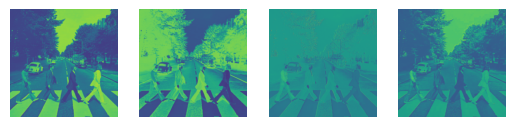

In [3]:
figure, axs = plt.subplots(1, 4)
for i in range(4):
    axs[i].imshow(img[:, :, i].detach().numpy())
    axs[i].axis("off")